### **Primer avance del proyecto, tecnicas de inteligencia artificial**

#### **Integrantes**

- Oscar Leonardo Riveros Perez

- Yovany Esneider Vargas Gutierrez

**Preproceso, adecuación de imagenes**

In [28]:
import cv2
from IPython.display import Image
import os
import numpy as np
import math
from matplotlib import pyplot as plt

#Se tienen 3 tipos de imagen
#Mano al interior
Indoor_P = cv2.imread('Images/Indoor_P.jpg',1)
Indoor_G = cv2.imread('Images/Indoor_G.jpg',1)

#Mano al exterior pero con un patron de ladrillos de fondo
Pattern_P = cv2.imread('Images/Pattern_P.jpg',1)
Pattern_G = cv2.imread('Images/Pattern_G.jpg',1)

#Mano en un ambiente donde hay varios tipos de objetos
Green_P = cv2.imread('Images/Green_P.jpg',1)
Green_G = cv2.imread('Images/Green_G.jpg',1)

#[:,:,::-1] -> Correccion para representar con matplotlib, ya que el arreglo de opencv esta en [B,G,R] y matplotlib [R,G,B]
Green_P, Green_G, Indoor_P, Indoor_G, Pattern_P, Pattern_G = Green_P[:,:,::-1],Green_G[:,:,::-1], Indoor_P[:,:,::-1], Indoor_G[:,:,::-1], Pattern_P[:,:,::-1], Pattern_G[:,:,::-1]

Original_P = [Indoor_P, Pattern_P, Green_P]
Original_G = [Indoor_G, Pattern_G, Green_G]

**Preproceso y adecuación de imagenes**

Antes de iniciar con el planteamieto del algoritmo a seguir para el reconocimiento de la mano, se hará una comparativa en diferentes espacios de color para encontrar el metodo con el mejor desempeño, a la hora de segmentar las imagenes mediante umbralización.

Los espacios de color más son compatibles con el reconocimiento de piel son el HSV y YCrCb. Sin embargo, en un estudio realizado por Michael J. Jones, demuestra que son más relavantes el numero de bins que el espacio de color utilizado en el reconocimiento de la piel, por tanto, también se pondrá a prueba este metodo.

In [30]:
#Funciones
def YCrCb(img):
    return (cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb))
def HSV(img):
    return (cv2.cvtColor(img, cv2.COLOR_RGB2HSV))
def lessBins(img, bins):
    q = 256/bins
    normalized_img = cv2.normalize(img, None, 0, bins-1, cv2.NORM_MINMAX)
    return(normalized_img)

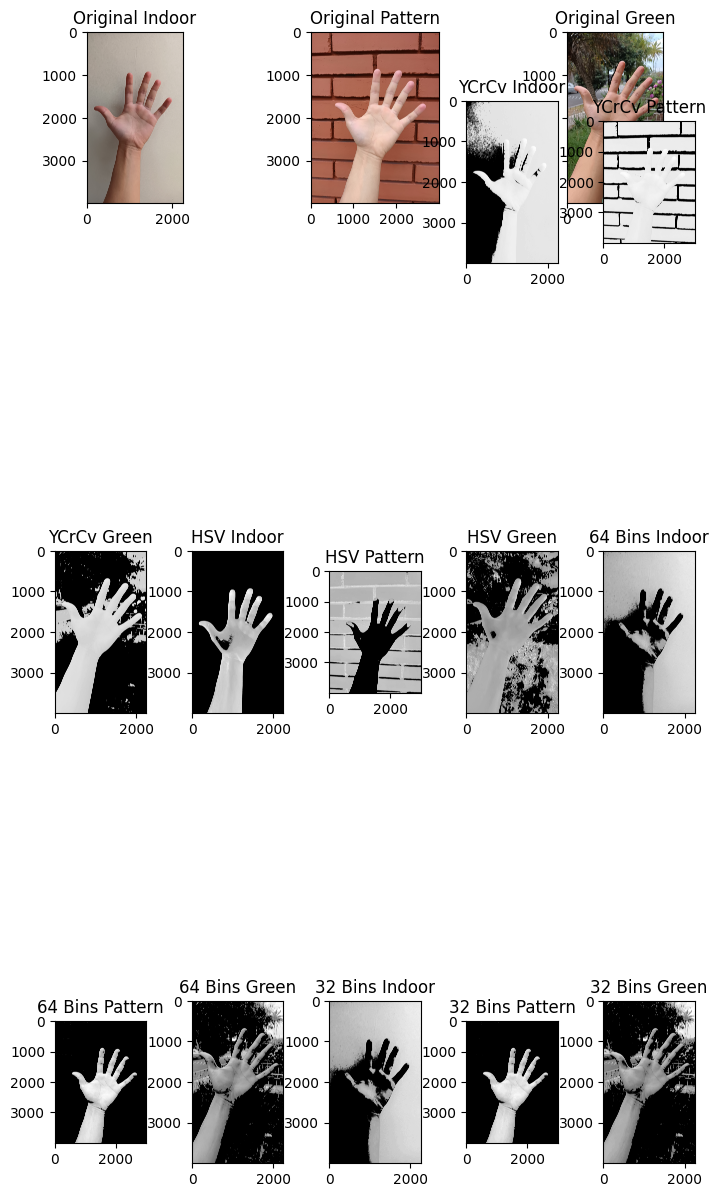

In [71]:
#Espacios de color
Manos_YCrCb = [YCrCb(Indoor_P), YCrCb(Pattern_P), YCrCb(Green_P)]
Manos_HSV = [HSV(Indoor_P), HSV(Pattern_P), HSV(Green_P)] 

#Reducción de bins
bins_0 = 64
Manos_128bins = [lessBins(Indoor_P, bins_0), lessBins(Pattern_P, bins_0), lessBins(Green_P, bins_0)]
bins_1 = 32
Manos_64bins = [lessBins(Indoor_P, bins_1), lessBins(Pattern_P, bins_1), lessBins(Green_P, bins_1)]

#Como solo se busca identificar la mano, se hace umbralización binaria y otsu
res = [Manos_YCrCb, Manos_HSV, Manos_128bins, Manos_64bins]
title1 = ['YCrCv ', 'HSV ', '64 Bins ', '32 Bins ']
title2 = ['Indoor', 'Pattern', 'Green']

plt.subplot(5,3,1), plt.imshow(Original_P[0]), plt.title('Original ' + title2[0])
plt.subplot(5,3,2), plt.imshow(Original_P[1]), plt.title('Original ' + title2[1])
plt.subplot(5,3,3), plt.imshow(Original_P[2]), plt.title('Original ' + title2[2])
bins = 255
c = 0
for i in range(4):
    for j in range(3):
        if i == 2:
            bins = bins_0
        elif i == 3:
            bins = bins_1
        #Se suavisa el histograma para eliminar minimos locales
        blur = cv2.GaussianBlur(res[i][j], (3,3), 0)
        img = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
        #Debido a que buscab los maximos globales lo mejor es usar umbral a cero
        tre, otsu = cv2.threshold(img,0,bins,cv2.THRESH_TOZERO + cv2.THRESH_OTSU)
        plt.subplot(5,3,c+4), plt.imshow(otsu, cmap=plt.cm.gray), plt.title(title1[i] + title2[j])
        c += 1
plt.subplots_adjust(top=3, bottom=0.5, left=0.0, right=1.0, hspace=0.5, wspace=0.5)
plt.show()

Aunque hay una leve ventaja en el interiores en el espacio de color HSV con respecto a la reducción en el número de bins, se evidencia que la reducción de bins es superior en todos los casos.